In [1]:
import pandas as pd
import quandl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

     Close
0  2718.26
1  2710.67
2  2804.73
3  2895.89
4  3252.91
5  3213.94
6  3378.94
        Close
0      134.21
1      144.54
2      139.00
3      116.99
4      105.21
5       97.75
6      112.50
7      115.91
8      112.30
9      111.50
10     113.57
11     112.67
12     117.20
13     115.24
14     115.00
15     117.98
16     111.50
17     114.22
18     118.76
19     123.02
20     123.50
21     121.99
22     122.00
23     122.88
24     123.89
25     126.70
26     133.20
27     131.98
28     133.48
29     129.75
...       ...
1526  2506.47
1527  2564.06
1528  2601.64
1529  2601.99
1530  2608.56
1531  2518.66
1532  2571.34
1533  2518.44
1534  2372.56
1535  2337.79
1536  2398.84
1537  2357.90
1538  2233.34
1539  1998.86
1540  1929.82
1541  2228.41
1542  2318.88
1543  2273.43
1544  2817.60
1545  2667.76
1546  2810.12
1547  2730.40
1548  2754.86
1549  2576.48
1550  2529.45
1551  2671.78
1552  2809.01
1553  2726.45
1554  2757.18
1555  2875.34

[1556 rows x 1 columns]


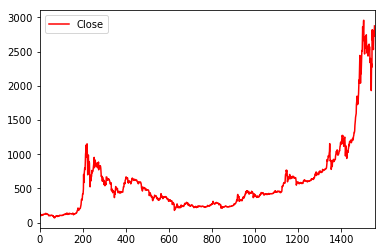

In [27]:
Training = pd.read_csv('bitcoin_price_Training - Training.csv',usecols=[4])
Testing = pd.read_csv('bitcoin_price_1week_Test - Test.csv',usecols=[4])
print(Testing)
Test = np.array(Testing['Close'].unique())
print(Training)
#df= df[['Adj.Open','Adj.High','Adj.Low','Adj.Close','Adj.Volume']]
Training.plot(color = 'r')


In [3]:
Training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 1 columns):
Close    1556 non-null float64
dtypes: float64(1)
memory usage: 12.2 KB


In [4]:
train_set = Training

test_set = Testing

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_set)
test_scaled = scaler.transform(test_set)

In [6]:
def next_batch(training_data,batch_size,steps):
    
    
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1),y_batch[:, 1:].reshape(-1, steps, 1) 

In [7]:
# Just one feature, the time series
num_inputs = 1
# Num of steps in each batch
num_time_steps = 7
# 100 neuron layer, play with this
num_neurons = 200
# Just one output, predicted time series
num_outputs = 1

## You can also try increasing iterations, but decreasing learning rate
# learning rate you can play with this
learning_rate = 0.05 
# how many iterations to go through (training steps), you can play with this
num_train_iterations = 7000
# Size of the batch of data
batch_size = 1

In [8]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [9]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs) 

In [10]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [11]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [22]:
init = tf.global_variables_initializer()
outputs

<tf.Tensor 'rnn/transpose:0' shape=(?, 7, 1) dtype=float32>

In [13]:
saver = tf.train.Saver()

0 	MSE: 34.2221
100 	MSE: 5.66678e-05
200 	MSE: 0.0854987
300 	MSE: 0.000112021
400 	MSE: 0.000641823
500 	MSE: 0.00150771
600 	MSE: 0.000602319
700 	MSE: 0.00386621
800 	MSE: 0.000175245
900 	MSE: 0.000429308
1000 	MSE: 0.000209539
1100 	MSE: 3.18019e-05
1200 	MSE: 0.000271018
1300 	MSE: 0.00217125
1400 	MSE: 0.000150396
1500 	MSE: 2.99778e-05
1600 	MSE: 2.90283e-05
1700 	MSE: 2.47087e-05
1800 	MSE: 1.6765e-05
1900 	MSE: 1.83182e-05
2000 	MSE: 0.000736434
2100 	MSE: 0.00113713
2200 	MSE: 0.000223723
2300 	MSE: 0.000133364
2400 	MSE: 0.000113345
2500 	MSE: 0.000206403
2600 	MSE: 1.31703e-05
2700 	MSE: 0.000126078
2800 	MSE: 0.00345316
2900 	MSE: 0.000184605
3000 	MSE: 0.000110016
3100 	MSE: 8.03922e-05
3200 	MSE: 0.00552511
3300 	MSE: 2.84905e-05
3400 	MSE: 1.43243e-05
3500 	MSE: 8.45684e-05
3600 	MSE: 0.00017304
3700 	MSE: 0.000165534
3800 	MSE: 0.00126841
3900 	MSE: 4.26916e-05
4000 	MSE: 0.000115035
4100 	MSE: 0.000729451
4200 	MSE: 1.49129e-05
4300 	MSE: 0.00108852
4400 	MSE: 7.205

ValueError: x and y must have same first dimension, but have shapes (1556, 1) and (1, 7, 1)

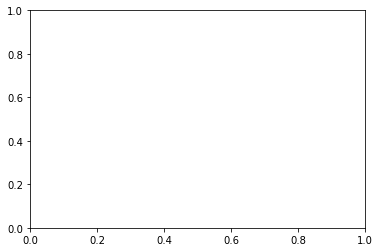

In [26]:
with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            Out = sess.run(outputs,feed_dict = {X:X_batch,y:y_batch})
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")
    plt.plot(Training,Out)

In [16]:
test_set


,Close
0,2718.26
1,2710.67
2,2804.73
3,2895.89
4,3252.91
5,3213.94
6,3378.94


In [17]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-7:])
    
    ## Now create a for loop that 
    for iteration in range(7):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./ex_time_series_model


In [18]:
train_seed

[array([ 0.86793347]),
 array([ 0.85165832]),
 array([ 0.9009129]),
 array([ 0.94840259]),
 array([ 0.91983195]),
 array([ 0.93046635]),
 array([ 0.97135669]),
 0.96184254,
 0.93659079,
 0.91220987,
 0.88514435,
 0.8626312,
 0.83379984,
 0.80330288]

In [19]:
results = scaler.inverse_transform(np.array(train_seed[7:]).reshape(7,1))

In [45]:
test_set['Generated'] = results
Tests = np.array(test_set['Generated'].unique())
print(Tests)
print(Test)

[ 2847.84716797  2774.87768555  2704.42456055  2626.21386719  2561.15820312
  2477.84472656  2389.71826172]
[ 2718.26  2710.67  2804.73  2895.89  3252.91  3213.94  3378.94]


In [47]:
for i in range(len(Test)):
    if (Test[i]-Tests[i])/Test[i]>0.2:
        print('in set: ',i,'There is a anomelous')
    

in set:  4 There is a anomelous
in set:  5 There is a anomelous
in set:  6 There is a anomelous


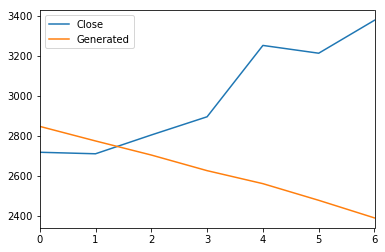

In [46]:
test_set.plot()